<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/Multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2025-09-14 14:47:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   255MB/s    in 1.9s    

2025-09-14 14:48:00 (255 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
zip_ref=zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref=zip_ref.extractall()

**lets walkthrough files etc in our data**

In [4]:
import os

In [5]:
for dirpath,dirnames,filenames in os.walk('10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directoiries and {len(filenames)} images in {dirpath}')

There are 2 directoiries and 0 images in 10_food_classes_all_data
There are 10 directoiries and 0 images in 10_food_classes_all_data/test
There are 0 directoiries and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directoiries and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directoiries and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directoiries and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directoiries and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directoiries and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directoiries and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directoiries and 250 images in 10_food_classes_all_data/test/steak
There are 0 directoiries and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directoiries and 250 images in 10_food_classes_all_data/test/pizza
There are 10 directoiries and 0 im

In [6]:
import numpy as np
import pathlib

In [7]:
data_dir=pathlib.Path('10_food_classes_all_data/train')

In [8]:
class_names=np.array(sorted([item.name for item in  data_dir.glob('*') ]))

In [9]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [10]:
# Setup train and test directories
train_dir='10_food_classes_all_data/train'
test_dir='10_food_classes_all_data/test'

In [11]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [12]:
def view_rand_img(target_dir,target_class):

    target_folder=target_dir+target_class
    random_image=random.choice(os.listdir(target_folder))
    print(random_image)

    img=mpimg.imread(target_folder+'/'+random_image)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)

    print(img.shape)



732473.jpg
(384, 512, 3)


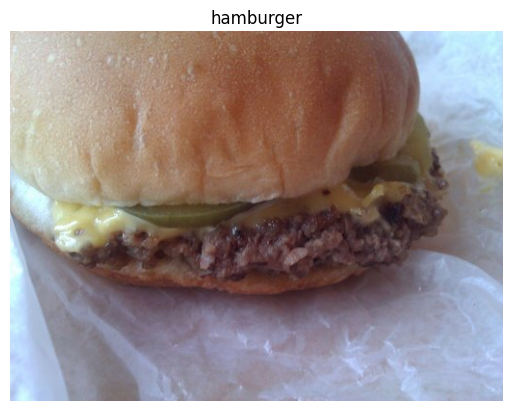

In [13]:
view_rand_img(target_dir='10_food_classes_all_data/train/',target_class=random.choice(class_names))

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_data_gen=ImageDataGenerator(rescale=1/255)
test_data_gen=ImageDataGenerator(rescale=1/255)

In [16]:
train_data=train_data_gen.flow_from_directory(train_dir,target_size=(256,256),class_mode='categorical',batch_size=32)
test_data=test_data_gen.flow_from_directory(test_dir,batch_size=32,target_size=(256,256),class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [17]:
from tensorflow.keras import Sequential,Input
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [18]:
import tensorflow as tf

In [19]:
model=Sequential([

    Conv2D(20,3,input_shape=(256,256,3),activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history=model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 144ms/step - accuracy: 0.1672 - loss: 2.2537 - val_accuracy: 0.2260 - val_loss: 2.0733
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 67s 127ms/step - accuracy: 0.3214 - loss: 1.9232 - val_accuracy: 0.2936 - val_loss: 1.9866
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.4601 - loss: 1.5656 - val_accuracy: 0.2952 - val_loss: 2.1338
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 137ms/step - accuracy: 0.7280 - loss: 0.8407 - val_accuracy: 0.2636 - val_loss: 2.6937
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 142ms/step - accuracy: 0.9265 - loss: 0.2552 - val_accuracy: 0.2592 - val_loss: 4.2883


In [20]:
model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.2662 - loss: 4.2527


[4.288328170776367, 0.25920000672340393]

`Lets plot loss curves`

In [33]:
def plot_loss_curves(history):
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']

    epochs=range(len(history.history['loss']))

    # Plot Loss
    plt.plot(epochs,loss,label='Training loss')
    plt.plot(epochs,val_loss,label='Validation Loss')
    plt.axis()
    plt.title('Loss')
    plt.legend()

    # Plot Accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label='Training Accuracy')
    plt.plot(epochs,val_accuracy,label='Validation Accuracy')
    plt.axis()
    plt.title('Accuracy')
    plt.legend()

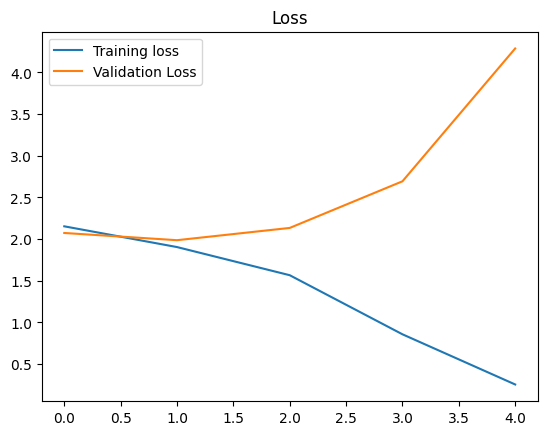

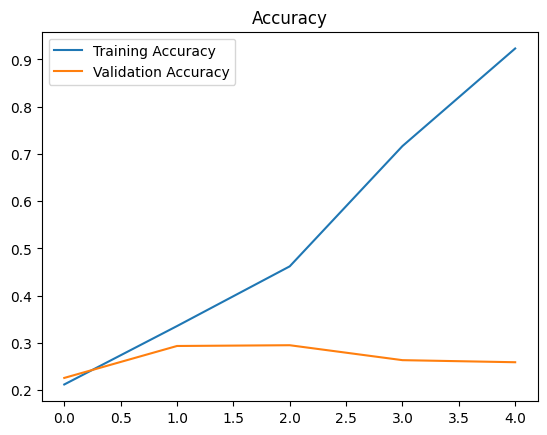

In [34]:
plot_loss_curves(history)

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 20)   │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 10)   │         1,810 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 122, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 37210)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       372,110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,128,902 (4.31 MB)

 Trainable params: 376,300 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 752,602 (2.87 MB)

**As it is clear that model is overfitting so  lets :**

* Adjust some model parameters so that we try to beat the baseline
* Simplify Our model a bit


In [40]:
# Lets Remove 2 convolutional Layers
model_1=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [42]:
history_1=model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 131ms/step - accuracy: 0.1873 - loss: 2.3221 - val_accuracy: 0.2904 - val_loss: 1.9709
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - accuracy: 0.3793 - loss: 1.7956 - val_accuracy: 0.3232 - val_loss: 1.9332
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.5920 - loss: 1.2791 - val_accuracy: 0.3188 - val_loss: 2.0665
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 119ms/step - accuracy: 0.8096 - loss: 0.6627 - val_accuracy: 0.2896 - val_loss: 2.6436
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - accuracy: 0.9403 - loss: 0.2640 - val_accuracy: 0.2764 - val_loss: 3.1397


In [43]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 38440)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │       384,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,156,802 (4.41 MB)

 Trainable params: 385,600 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 771,202 (2.94 MB)

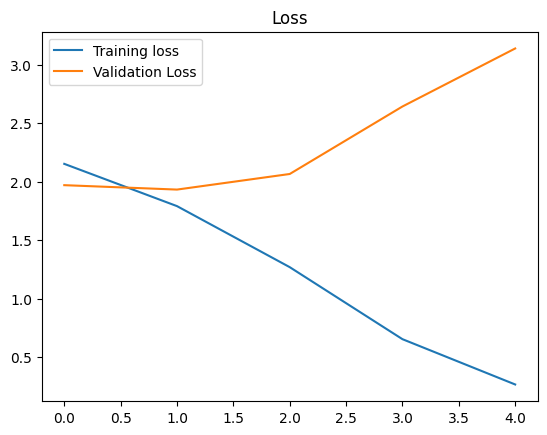

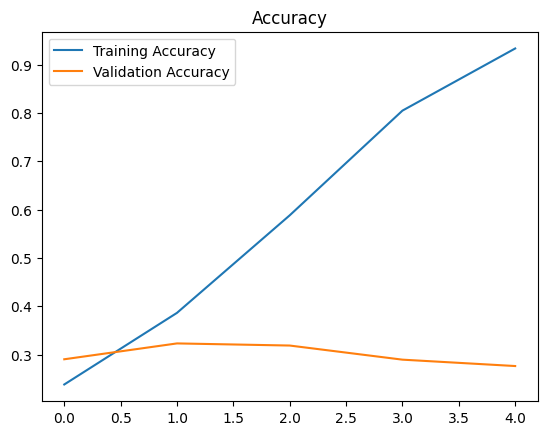

In [44]:
plot_loss_curves(history_1)

# **As its clear this the performance remained same as the old one**
> **lets now reduce overfitting by Data Augmention**



In [46]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255,height_shift_range=0.2,width_shift_range=0.2,rotation_range=0.2,zoom_range=0.2,horizontal_flip=True)


In [47]:
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,batch_size=32,target_size=(256,256),class_mode='categorical')

Found 7500 images belonging to 10 classes.


**Lets now create another model but this time lets fit it on augmented Data**

In [48]:
model_2=tf.keras.models.clone_model(model_1)
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_2=model_2.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 589ms/step - accuracy: 0.1515 - loss: 2.2703 - val_accuracy: 0.2688 - val_loss: 2.0536
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 131s 547ms/step - accuracy: 0.2377 - loss: 2.1074 - val_accuracy: 0.2924 - val_loss: 2.0329
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 128s 542ms/step - accuracy: 0.2682 - loss: 2.0726 - val_accuracy: 0.2988 - val_loss: 1.9789
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 550ms/step - accuracy: 0.2852 - loss: 2.0393 - val_accuracy: 0.3304 - val_loss: 1.9104
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 131s 559ms/step - accuracy: 0.2968 - loss: 1.9970 - val_accuracy: 0.3480 - val_loss: 1.8827


In [49]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.3598 - loss: 1.8565


[1.882654070854187, 0.3479999899864197]

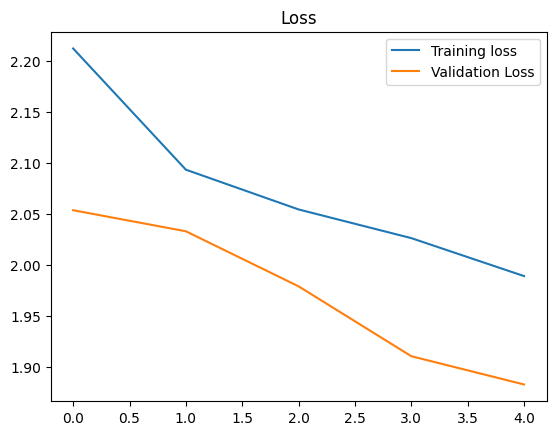

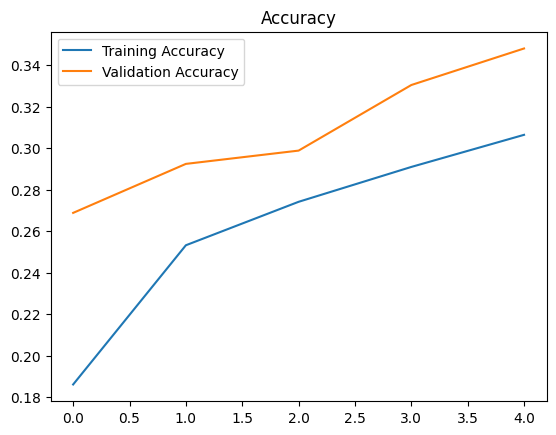

In [50]:
plot_loss_curves(history_2)

In [51]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-hamburger.jpeg

--2025-09-14 15:43:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.04s   

2025-09-14 15:43:24 (40.7 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

--2025-09-14 15:43:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, aw

# **Load and Preprocess Image**

In [53]:
def load_and_prep_image(filenames):

    img=tf.io.read_file(filenames)
    img=tf.image.decode_image(img)
    img=tf.image.resize(img,size=[256,256])
    img=img/255
    return img

**Predict and plot images**

In [54]:
def plot_and_predict(model,filenames,class_names=class_names):
    img=load_and_prep_image(filenames)
    pred=model.predict(tf.expand_dims(img,axis=0))
    if len(pred[0])>1:
       pred_class=class_names[tf.argmax(pred[0])]
    else:
      pred_class=class_names[int(tf.round(pred[0]))]

    plt.imshow(img)
    plt.title(f'Predictions {pred_class}')
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


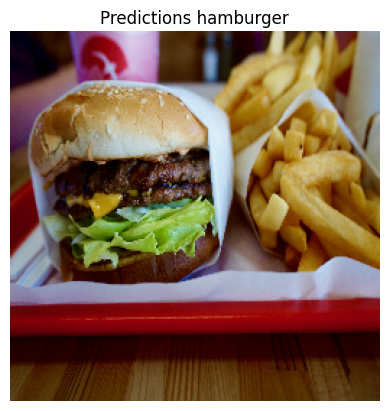

In [60]:
plot_and_predict(model_2,'03-hamburger.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


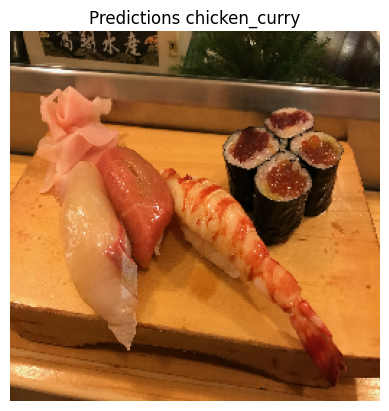

In [63]:
plot_and_predict(model_2,'03-sushi.jpeg')

**This is how we save and load model**

In [65]:
model_2.save("saved_model_2.h5")

In [66]:
loaded_model_2=tf.keras.models.load_model('saved_model_2.h5')
loaded_model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.3462 - loss: 1.8875


[1.8826543092727661, 0.3479999899864197]

In [67]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.3385 - loss: 1.8884


[1.8826546669006348, 0.3479999899864197]